# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data.

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies.

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.2f}'.format

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [ ]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`.

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f'Shape of df_data: {df_data.shape}')
print(f'df_data columns: {df_data.columns}')
print(f'df_data number of NaN: {df_data.isnull().sum().sum()}')

Shape of df_data: (2000, 96)
df_data columns: Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO',

In [ ]:
for column in df_data.columns.tolist():
  print(f'{column} has NaN: {df_data[column].isnull().sum()}')

ID has NaN: 0
EARNINGS has NaN: 0
S has NaN: 0
EXP has NaN: 0
FEMALE has NaN: 0
MALE has NaN: 0
BYEAR has NaN: 0
AGE has NaN: 0
AGEMBTH has NaN: 44
HHINC97 has NaN: 370
POVRAT97 has NaN: 373
HHBMBF has NaN: 0
HHBMOF has NaN: 0
HHOMBF has NaN: 0
HHBMONLY has NaN: 0
HHBFONLY has NaN: 0
HHOTHER has NaN: 0
MSA97NO has NaN: 0
MSA97NCC has NaN: 0
MSA97CC has NaN: 0
MSA97NK has NaN: 0
ETHBLACK has NaN: 0
ETHHISP has NaN: 0
ETHWHITE has NaN: 0
EDUCPROF has NaN: 0
EDUCPHD has NaN: 0
EDUCMAST has NaN: 0
EDUCBA has NaN: 0
EDUCAA has NaN: 0
EDUCHSD has NaN: 0
EDUCGED has NaN: 0
EDUCDO has NaN: 0
PRMONM has NaN: 879
PRMONF has NaN: 1073
PRMSTYUN has NaN: 533
PRMSTYPE has NaN: 533
PRMSTYAN has NaN: 533
PRMSTYAE has NaN: 533
PRFSTYUN has NaN: 790
PRFSTYPE has NaN: 790
PRFSTYAN has NaN: 790
PRFSTYAE has NaN: 790
SINGLE has NaN: 0
MARRIED has NaN: 0
COHABIT has NaN: 0
OTHSING has NaN: 0
FAITHN has NaN: 0
FAITHP has NaN: 0
FAITHC has NaN: 0
FAITHJ has NaN: 0
FAITHO has NaN: 0
FAITHM has NaN: 0
ASVABAR h

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [ ]:
df_clean = df_data.drop_duplicates()

In [ ]:
for column in df_clean.columns.tolist():
  print(f'{column} has NaN: {df_clean[column].isnull().sum()}')

ID has NaN: 0
EARNINGS has NaN: 0
S has NaN: 0
EXP has NaN: 0
FEMALE has NaN: 0
MALE has NaN: 0
BYEAR has NaN: 0
AGE has NaN: 0
AGEMBTH has NaN: 34
HHINC97 has NaN: 282
POVRAT97 has NaN: 284
HHBMBF has NaN: 0
HHBMOF has NaN: 0
HHOMBF has NaN: 0
HHBMONLY has NaN: 0
HHBFONLY has NaN: 0
HHOTHER has NaN: 0
MSA97NO has NaN: 0
MSA97NCC has NaN: 0
MSA97CC has NaN: 0
MSA97NK has NaN: 0
ETHBLACK has NaN: 0
ETHHISP has NaN: 0
ETHWHITE has NaN: 0
EDUCPROF has NaN: 0
EDUCPHD has NaN: 0
EDUCMAST has NaN: 0
EDUCBA has NaN: 0
EDUCAA has NaN: 0
EDUCHSD has NaN: 0
EDUCGED has NaN: 0
EDUCDO has NaN: 0
PRMONM has NaN: 636
PRMONF has NaN: 789
PRMSTYUN has NaN: 387
PRMSTYPE has NaN: 387
PRMSTYAN has NaN: 387
PRMSTYAE has NaN: 387
PRFSTYUN has NaN: 583
PRFSTYPE has NaN: 583
PRFSTYAN has NaN: 583
PRFSTYAE has NaN: 583
SINGLE has NaN: 0
MARRIED has NaN: 0
COHABIT has NaN: 0
OTHSING has NaN: 0
FAITHN has NaN: 0
FAITHP has NaN: 0
FAITHC has NaN: 0
FAITHJ has NaN: 0
FAITHO has NaN: 0
FAITHM has NaN: 0
ASVABAR ha

In [ ]:
df_clean.dropna(subset=['HHINC97'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## Descriptive Statistics

In [ ]:
df_clean.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,205.00","1,205.00","1,205.00","1,205.00","1,205.00","1,205.00","1,205.00","1,205.00","1,187.00","1,205.00",...,"1,205.00","1,205.00","1,205.00","1,205.00","1,205.00","1,205.00","1,205.00","1,205.00","1,205.00","1,205.00"
mean,"3,642.59",18.65,14.49,6.76,0.48,0.52,"1,982.08",28.92,26.11,"58,310.67",...,0.76,0.15,0.29,0.34,0.22,0.05,0.54,0.41,0.00,0.00
std,"1,952.02",11.95,2.78,2.84,0.50,0.50,1.39,1.39,4.90,"43,868.05",...,0.44,0.36,0.45,0.47,0.42,0.21,0.50,0.49,0.05,0.00
min,4.00,2.13,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,090.00",11.25,12.00,4.73,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,582.00",15.68,14.00,6.73,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,206.00",22.50,16.00,8.71,1.00,1.00,"1,983.00",30.00,29.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,978.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,41.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

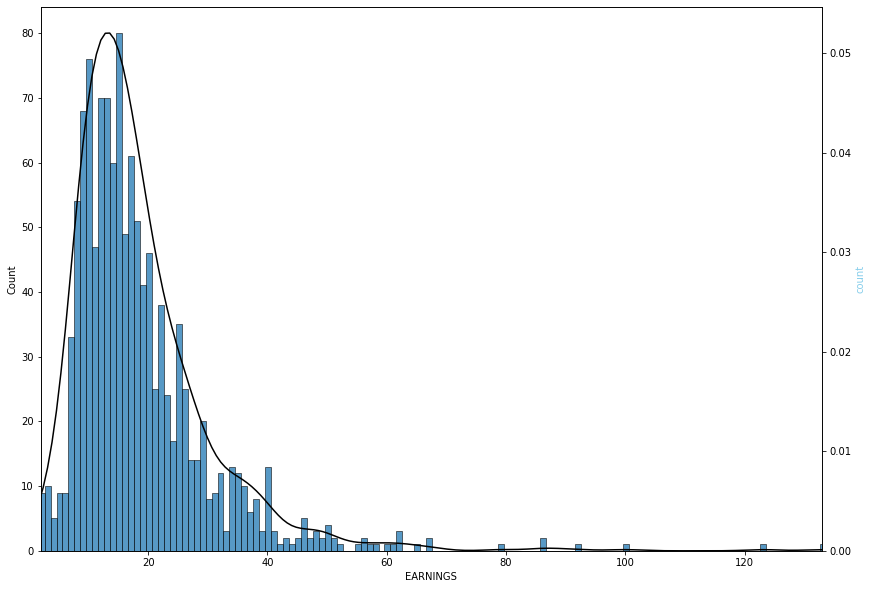

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,10))
sns.histplot(data=df_clean, x="EARNINGS", discrete=True)
ax1.set_xlim((2, 133))
ax2=ax1.twinx()
ax2.set_ylabel('count', color='skyblue')
sns.kdeplot(data=df_clean, x="EARNINGS", ax=ax2, color='black')
fig.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [ ]:
cols_to_drop = []
for column in df_clean.columns.tolist():
  if df_clean[column].isnull().sum() > 0:
    cols_to_drop.append(column)

df_clean2 = df_clean.drop(axis='columns', labels=cols_to_drop)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [ ]:
X=df_clean2['S'][:,np.newaxis]
y=df_clean2['EARNINGS']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10,test_size=0.2, shuffle=True)

<ipython-input-59-ae2c8b1ef428>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=df_clean2['S'][:,np.newaxis]


In [ ]:
regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [ ]:
print(f'The intercept is: {regression.intercept_}')
print(f'The slope coefficient is: {regression.coef_}')
print(f'The r-squared is: {regression.score(X, y)}')

The intercept is: -1.0474062469304002
The slope coefficient is: [1.36577377]
The r-squared is: 0.08540839137519562


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

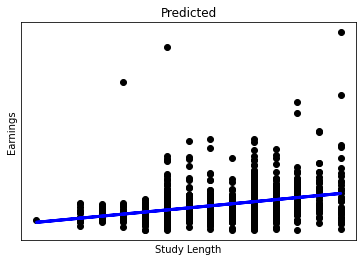

In [ ]:
predicted_values = regression.predict(X_train)
residuals = (y_train - predicted_values)
# Plot outputs
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, predicted_values, color="blue", linewidth=3)
plt.title("Predicted")
plt.xlabel("Study Length")
plt.ylabel("Earnings")

plt.xticks(())
plt.yticks(())

plt.show()

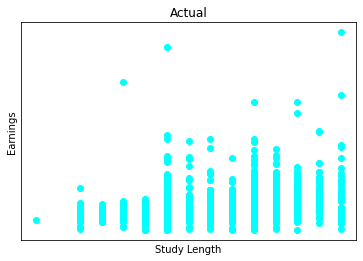

In [ ]:
plt.scatter(df_clean2['S'], df_clean2['EARNINGS'], color='cyan')
plt.title("Actual")
plt.xlabel("Study Length")
plt.ylabel("Earnings")
plt.xticks(())
plt.yticks(())

plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data?

In [ ]:
X=df_clean2[['S', 'EXP']]
y=df_clean2['EARNINGS']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10,test_size=0.2, shuffle=True)

In [ ]:
regression2 = LinearRegression()

regression2.fit(X_train, y_train)

LinearRegression()

### Evaluate the Coefficients of the Model

In [ ]:
print(f'The intercept is: {regression2.intercept_}')
print(f'The slope coefficient is: {regression2.coef_}')
print(f'The r-squared is: {regression2.score(X, y)}')

The intercept is: -14.591104997393185
The slope coefficient is: [1.88372666 0.89998494]
The r-squared is: 0.11517856800143811


### Analyse the Estimated Values & Regression Residuals

In [ ]:
predicted_values2 = regression2.predict(X_train)
residuals2 = (y_train - predicted_values2)

In [ ]:
fig = px.scatter(x=y_train, y=predicted_values2, trendline="lowess",trendline_color_override='black')
fig.update_layout(xaxis_title='Actual Earnings',
                  yaxis_title='Predicted Earnings',)
fig.show()

In [ ]:
fig = px.scatter(x=predicted_values2, y=residuals2, trendline="lowess",trendline_color_override='black')
fig.update_layout(yaxis_title='Residuals',
                  xaxis_title='Predicted earnings',)
fig.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [ ]:
earnings_est = regression2.predict([[16, 5]])[0]
print(f'The earnings estimate is ${earnings_est:.3}')

The log price estimate is $20.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings?

In [ ]:
X3=df_clean2.drop('EARNINGS', axis=1)
y3=df_clean2['EARNINGS']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, random_state=10,test_size=0.2, shuffle=True)
regression3 = LinearRegression()
regression3.fit(X_train3, y_train3)
print(f'The intercept is: {regression3.intercept_}')
print(f'The slope coefficient is: {regression3.coef_}')
print(f'The r-squared is: {regression3.score(X3, y3)}')

The intercept is: 27838.117071489833
The slope coefficient is: [-1.17597640e-05  8.32829291e-01  6.42620709e-01 -6.47779892e+00
 -3.44065153e+00 -1.44419745e+01 -1.47442172e+01  1.10649883e-05
 -1.07659404e-01 -1.41601804e+00 -2.27611837e+00 -1.18710532e+00
 -3.30038445e+00  1.76048608e+00  6.61331655e-01  2.36736986e+00
  1.94719821e+00  1.78449206e+00 -1.82615304e+00  6.11364442e-01
 -1.33311414e+00  1.38004337e+01  3.25273448e+00 -2.52834776e+00
 -5.18982626e+00 -6.58797596e+00 -7.31716020e+00 -8.73523058e+00
 -5.56333497e+00 -1.84100949e+00 -2.04723155e-02 -1.61918269e+00
 -1.93290354e+00  5.05572435e+00  6.10779626e+00  5.62231362e+00
  5.28668030e+00  6.11504090e+00  5.97967848e+00 -1.58428097e+06
  1.72379581e+06  1.72379600e+06  6.02385651e+05  2.63798645e-01
 -6.59112769e-01  3.97885794e+06 -2.15267711e+06 -4.15308526e+06
  6.00321131e-05  1.34575577e-01 -1.08553384e-02 -1.20820913e-02
 -1.39768036e-02  2.42013117e-01 -3.87317916e-02 -1.56566451e+00
 -7.63849970e-01 -9.3217678